<a href="https://colab.research.google.com/github/apriliadesa/Analisis-Data-dengan-Python/blob/main/Another_copy_of_Modelgunung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [47]:
tf.__version__

'2.16.1'

In [48]:
!pip install tensorflow==2.16.1

In [49]:
!pip install scikit-learn==1.5.0

In [50]:
import sklearn
sklearn.__version__

'1.2.2'

In [51]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [52]:
data = pd.read_csv("/content/mountain.csv")
data

,id,magmaCategory,image,name,gloc,giframe,gplaceid,alias,description,province,...,imageCredits,imageCreditsUrl,imageLicenseType,imageLicenseTypeUrl,statusLevel,statusDate,createdAt,updatedAt,restrictedFrom,restrictedUntil
0,Semeru,A,/images/Semeru.webp,Semeru,https://goo.gl/maps/gdm4SKvjgXycdrHd6,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJuxfY4Yk-1i0RVI9IPO3UFJw,['Mahameru'],Gunung Semeru adalah gunung berapi aktif dan t...,Jawa Timur,...,Fajruddin Mudzakkir,https://unsplash.com/@fnhaven?utm_source=unspl...,Unsplash License,https://unsplash.com/license,3.0,NaN,2022-12-03T23:58:47.229Z,2024-02-04T21:50:23.387Z,2021-07-03T00:00:00.000Z,NaN
1,Slamet,A,/images/Slamet.webp,Slamet,https://goo.gl/maps/8RU36AWsaWUpXR4F6,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJhRL3TRjzby4RWy-gaDSeg3k,[],Gunung Slamet adalah gunung tertinggi kedua di...,Jawa Tengah,...,Aziedane,https://commons.wikimedia.org/wiki/File:Gunung...,CC BY-SA 3.0,https://creativecommons.org/licenses/by-sa/3.0...,2.0,NaN,2022-12-03T23:58:47.229Z,2023-12-09T22:44:54.729Z,NaN,NaN
2,Sumbing,B,/images/Sumbing.webp,Sumbing,https://goo.gl/maps/EsFxoXVdagdBN5zk7,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJEfQbe2mcei4RLX1YwrV2sXw,[],Gunung Sumbing adalah sebuah gunung yang terle...,Jawa Tengah,...,Rokok Indonesia,https://flic.kr/p/pv9DXo,CC BY 2.0,https://creativecommons.org/licenses/by/2.0/,NaN,NaN,2022-12-03T23:58:47.229Z,2023-12-03T11:50:01.569Z,NaN,NaN
3,Raung,A,/images/Raung.webp,Raung,https://goo.gl/maps/AQoZGfXpneac51v79,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJL07Icye01i0RdQ7f_W0REDo,[],Gunung Raung adalah gunung yang terletak di pr...,Jawa Timur,...,Fajar.andunisy,https://commons.wikimedia.org/wiki/File:Gunung...,CC0 1.0,https://creativecommons.org/publicdomain/zero/...,2.0,NaN,2022-12-03T23:58:47.229Z,2023-12-22T13:18:34.391Z,NaN,NaN
4,Arjuno,NaN,/images/Arjuno-Welirang.webp,Arjuno,https://maps.app.goo.gl/SuZeHekKQ5JVVQEVA,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,[],Gunung Arjuno merupakan gunung berapi kerucut ...,Jawa Timur,...,NaN,https://commons.wikimedia.org/wiki/File:Arjuno...,Attribution only license,https://commons.wikimedia.org/wiki/Category:At...,NaN,NaN,2023-10-20T20:26:01.063Z,2023-12-03T11:50:01.569Z,NaN,NaN
5,Lawu,B,/images/Lawu.webp,Lawu,https://goo.gl/maps/1zH19twkYjihzUBV7,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJow5UOIGMeS4RKz_McHA8OXg,[],Gunung Lawu adalah sebuah gunung berapi tua ya...,Jawa Tengah,...,Rizal Febri Ardiansyah,https://commons.wikimedia.org/wiki/File:Gunung...,CC BY-SA 3.0,https://creativecommons.org/licenses/by-sa/3.0...,NaN,NaN,2022-12-03T23:58:47.229Z,2023-12-03T11:50:01.569Z,NaN,NaN
6,Welirang,A,/images/Arjuno-Welirang.webp,Welirang,https://maps.app.goo.gl/odc6qi1KiZvN8FwC8,https://www.google.com/maps/embed?pb=!1m18!1m1...,NaN,[],Gunung Welirang adalah sebuah gunung berapi ya...,Jawa Timur,...,NaN,https://commons.wikimedia.org/wiki/File:Arjuno...,Attribution only license,https://commons.wikimedia.org/wiki/Category:At...,NaN,NaN,2023-10-20T20:30:12.951Z,2023-12-03T11:50:01.569Z,NaN,NaN
7,Merbabu,B,/images/Merbabu.webp,Merbabu,https://goo.gl/maps/nmiD3CSGL6RzuchD8,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJZ0dUXkV7ei4R3i2tgG4Mr_c,"['Puncak Kenteng Songo', 'Puncak Syarif', 'Pun...",Gunung Merbabu terletak dalam kawasan Taman Na...,Jawa Tengah,...,Kondephy,https://en.wikipedia.org/wiki/Mount_Merbabu#/m...,CC BY-SA 4.0,https://creativecommons.org/licenses/by-sa/4.0/,NaN,NaN,2022-12-03T23:58:47.229Z,2023-12-03T11:50:01.569Z,NaN,NaN
8,Sindoro,NaN,/images/Sindoro.webp,Sindoro,https://goo.gl/maps/ZKigGb8xLipmg5jt9,https://www.google.com/maps/embed?pb=!1m18!1m1...,ChIJQxo1VXV1cC4RtawU7erQH24,[],Gunung Sindoro memiliki tingkat kesulitan yang...,Jawa Tengah,...,"Lee Siebert, 1995 (Smithsonian Institution)",https://volcano.si.edu/gallery/ShowImage.cfm?p...,CC0 1.0,https://creativecommons.org/publicdomain/zero/...,NaN,NaN,2022-12-03T23:58:47.229Z,2023-12-03T11:50:01.569

In [53]:
data['name']

0               Semeru
1               Slamet
2              Sumbing
3                Raung
4               Arjuno
5                 Lawu
6             Welirang
7              Merbabu
8              Sindoro
9             Argopuro
10             Ciremai
11           Pangrango
12              Merapi
13                Gede
14             Cikuray
15                Ijen
16          Papandayan
17          Kawi-Butak
18             Kendang
19                Prau
20               Dieng
21               Wilis
22              Patuha
23             Malabar
24               Bromo
25              Guntur
26              Kembar
27               Salak
28         Talagabodas
29        Wayang-Windu
30          Galunggung
31    Tangkuban Perahu
32             Ungaran
33            Telomoyo
34               Kelud
35            Kamojang
36            Perbakti
37            Tampomas
38        Penanggungan
39            Lamongan
40               Muria
41    Kiaraberes-Gagak
42         Sanggabuana
43         

In [54]:
data.columns

Index(['id', 'magmaCategory', 'image', 'name', 'gloc', 'giframe', 'gplaceid',
       'alias', 'description', 'province', 'elevation', 'lat', 'lon',
       'imageCredits', 'imageCreditsUrl', 'imageLicenseType',
       'imageLicenseTypeUrl', 'statusLevel', 'statusDate', 'createdAt',
       'updatedAt', 'restrictedFrom', 'restrictedUntil'],
      dtype='object')

In [55]:
# Clean and prepare mountain data
def clean_coordinate(coord):
    try:
        return float(coord.replace('.', '').replace(',', '.'))
    except:
        return None

data['lat'] = data['lat'].apply(clean_coordinate)
data['lon'] = data['lon'].apply(clean_coordinate)
data['elevation'] = pd.to_numeric(data['elevation'], errors='coerce')
data.dropna(subset=['lat', 'lon', 'elevation'], inplace=True)


# Preprocessing pipeline
numeric_features = ['elevation', 'lat', 'lon']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
X = data.drop(columns=['name'])
X_processed = preprocessor.fit_transform(X)

# Membuat matriks TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['name'])

# Gabungkan semua fitur
X_features = np.hstack([X_processed, tfidf_matrix.toarray()])

In [56]:
tfidf_matrix.toarray().shape

(47, 51)

In [57]:
# Extract feature names
numeric_feature_names = numeric_features
tfidf_feature_names = tfidf.get_feature_names_out()

# Combine feature names
all_feature_names = numeric_feature_names + tfidf_feature_names.tolist()

# Create a DataFrame with the combined features and names
X_features_df = pd.DataFrame(X_features, columns=all_feature_names)

In [58]:
X_features_df

,elevation,lat,lon,argopuro,arjuno,baluran,bromo,butak,cikuray,ciremai,...,sumbing,talagabodas,tampomas,tangkuban,telomoyo,ungaran,wayang,welirang,wilis,windu
0,1.773915,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
1,1.445528,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,1.363431,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,1.327093,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,1.320364,-2.081873,1.646608,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
5,1.220771,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
6,1.074074,-2.071668,1.646320,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.000000
7,1.059269,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
8,1.047157,0.551504,-0.624939,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
9,0.982556,-2.150118,1.666453,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [59]:
X_features

array([[ 1.77391525,  0.55150357, -0.62493942, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44552803,  0.55150357, -0.62493949, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.36343122,  0.55150357, -0.62493948, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.61897077,  0.5515036 , -0.62494169, ...,  0.        ,
         0.        ,  0.        ],
       [-2.25824918,  0.5515036 , -0.62494169, ...,  0.        ,
         0.        ,  0.        ],
       [-2.44801393,  0.28901465, -0.39578708, ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
cosine_sim = cosine_similarity(X_features)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(46, axis=1).sample(46, axis=0)

Shape: (47, 47)


name,Telomoyo,Galunggung,Ungaran,Merapi,Gede,Ciremai,Merbabu,Patuha,Papandayan,Karaha,...,Kembar,Kawi-Butak,Slamet,Baluran,Muria,Kiaraberes-Gagak,Sindoro,Cikuray,Bromo,Ijen
name,,,,,,,,,,,,,,,,,,,,,
Merapi,-0.604083,0.237440,-0.572899,1.000000,0.575857,0.596672,0.605636,0.387480,0.491885,-0.198460,...,-0.348027,0.486514,0.628436,-0.174649,-0.655398,-0.090559,0.604531,-0.360728,0.330619,0.536804
Cikuray,0.766963,-0.602837,0.792132,-0.360728,-0.364404,-0.321378,-0.298564,-0.550184,-0.474310,-0.534045,...,0.389614,-0.479403,-0.212484,-0.545442,0.689170,-0.578288,-0.301573,1.000000,-0.576282,-0.424154
Salak,0.374357,-0.293389,0.381092,-0.327050,-0.327642,-0.319829,-0.314967,-0.327132,-0.336890,-0.117793,...,0.739048,-0.336804,-0.292785,-0.130057,0.415010,-0.170778,-0.315634,0.316950,-0.316494,-0.334963
Perbakti,-0.346928,0.440919,-0.393346,-0.013788,-0.008906,-0.064434,-0.092555,0.293607,0.152557,0.651051,...,-0.261326,0.160982,-0.191641,0.647078,-0.248231,0.625770,-0.088896,-0.598755,0.355470,0.074669
Sumbing,-0.557772,0.138421,-0.511909,0.625273,0.621832,0.658958,0.676064,0.338914,0.488654,-0.386252,...,-0.305039,0.480641,0.726883,-0.359584,-0.639164,-0.263472,0.673903,-0.229162,0.261331,0.557644
Slamet,-0.549981,0.126005,-0.502545,0.628436,0.624835,0.663765,0.681777,0.331733,0.486301,-0.407187,...,-0.298663,0.478003,1.000000,-0.380284,-0.634647,-0.283119,0.679499,-0.212484,0.251982,0.557895
Lurus,0.044385,0.289384,-0.022593,-0.387317,-0.381125,-0.450347,-0.484386,0.044458,-0.164685,0.782158,...,-0.048682,-0.152752,-0.598639,0.762778,0.175520,0.687030,-0.479995,-0.365641,0.143339,-0.271945
Semeru,-0.519731,0.082644,-0.467209,0.635216,0.631093,0.675953,0.696954,0.304985,0.475095,-0.476301,...,-0.274885,0.465878,0.761374,-0.448767,-0.615071,-0.348620,0.694287,-0.153956,0.218314,0.555155
Kamojang,-0.357975,0.442222,-0.403181,0.000234,0.005019,-0.049454,-0.077079,0.299986,0.162853,0.639783,...,-0.267096,0.171065,-0.174628,0.636421,-0.261499,0.617347,-0.073483,-0.601441,0.359865,0.086821


In [61]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_features.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(X_features.shape[1], activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Pelatihan model dengan data yang telah diproses sebagai fitur dan target yang sama dengan input
X_train = X_features
y_train = X_train  # target adalah vektor fitur yang sama dengan input (unsupervised learning)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.2898 - mae: 0.5101 - val_loss: 0.3350 - val_mae: 0.5219
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2814 - mae: 0.5002 - val_loss: 0.3262 - val_mae: 0.5137
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2734 - mae: 0.4928 - val_loss: 0.3172 - val_mae: 0.5050
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2601 - mae: 0.4814 - val_loss: 0.3076 - val_mae: 0.4954
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2623 - mae: 0.4803 - val_loss: 0.2976 - val_mae: 0.4850
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2489 - mae: 0.4698 - val_loss: 0.2870 - val_mae: 0.4735
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2422 - mae: 0.4565 - val_loss: 0.2759 - val_mae: 0.4609
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2266 - mae: 0.4409 - val_loss: 0.2640 - val_mae: 0.4467
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2256 - mae: 0.4378 - va

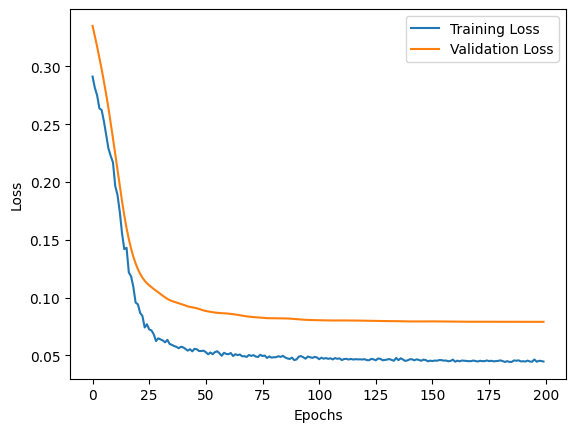

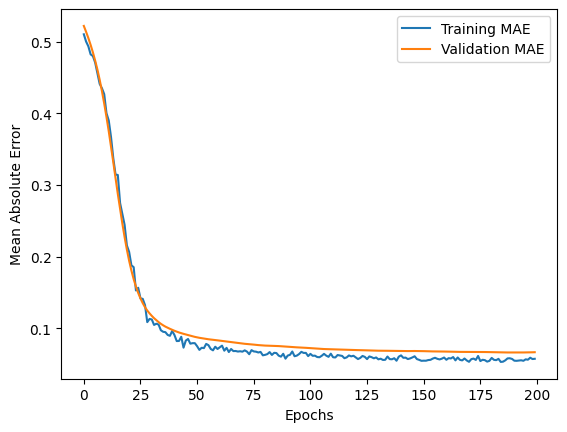

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [63]:
model.save('mountain_recommender_model.h5')


In [64]:
# from tensorflow import keras

# model.save('modelgunung.keras')

In [65]:
model.save('mountain_recommender_model.h5')


In [66]:
# Menyimpan model ke format .keras
model.save('mountain_recommender_model.keras')

In [67]:
# import tensorflow as tf

# # Load the Keras model
# model = tf.keras.models.load_model('mountain_recommender_model.h5')

# # Convert the model to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TFLite model
# with open('mountain_recommender_model.tflite', 'wb') as f:
#     f.write(tflite_model)


In [68]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('mountain_recommender_model.keras')

# Verify the model by printing its summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 54)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,614 (146.93 KB)

 Trainable params: 18,806 (73.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,808 (73.47 KB)

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_mountain_nn(mountain_name, model=model, preprocessor=preprocessor, tfidf=tfidf):
    # Mendapatkan indeks trip yang sesuai
    idx = data[data['name'] == mountain_name].index[0]

    # Mendapatkan fitur trip tanpa kolom target
    mountain_features = data.iloc[idx].drop('name')

    # Memproses fitur numerik menggunakan preprocessor
    mountain_features_processed = preprocessor.transform(pd.DataFrame([mountain_features]))

    # Memproses fitur teks menggunakan TF-IDF
    mountain_tfidf = tfidf.transform([mountain_name])

    # Menggabungkan semua fitur yang telah diproses
    mountain_input = np.hstack([mountain_features_processed, mountain_tfidf.toarray()])

    # Memprediksi menggunakan model neural network
    recommendations = model.predict(mountain_input)

    # Menghitung cosine similarity antara prediksi dan semua fitur
    cosine_similarities = cosine_similarity(recommendations, X_features).flatten()

    # Mendapatkan indeks dari 10 nilai similarity tertinggi, excluding the input trip itself
    top_indices = cosine_similarities.argsort()[-11:][::-1]  # get top 11, to exclude the input trip

    # Filter out the input trip from the recommendations
    recommended_trips = [data.iloc[i]['name'] for i in top_indices if data.iloc[i]['name'] != mountain_name]

    # Mengembalikan nama trip yang direkomendasikan
    return recommended_trips[:10]  # return top 10

# Contoh penggunaan
print(recommend_mountain_nn('Bromo'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
['Patuha', 'Malabar', 'Wilis', 'Guntur', 'Dieng', 'Papandayan', 'Kawi-Butak', 'Kendang', 'Wayang-Windu', 'Galunggung']


In [70]:
['Patuha', 'Dieng', 'Galunggung', 'Wilis', 'Malabar', 'Kawi-Butak', 'Kendang', 'Papandayan', 'Guntur', 'Talagabodas']

['Patuha',
 'Dieng',
 'Galunggung',
 'Wilis',
 'Malabar',
 'Kawi-Butak',
 'Kendang',
 'Papandayan',
 'Guntur',
 'Talagabodas']